# **Analysis Data Project: Customer Behavior Insights through RFM Analysis in E-Commerce**

* **Name**: Gusti Ayu Putu Erika Erlina

* **Email**: erika.erlinaa@gmail.com

* **ID Dicoding**: erikaaa777

# **Questions:**

* Analyze the growth of the e-commerce based on the monthly revenue
* Show best customers based on RFM Parameters
* Give the distribution of monetary in recency segment and value segment
* Analyze the correlation of value segment and recency segment

# **Import Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

### Gathering Data

load customers table

In [1377]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


load order items table

In [1378]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


load order payments table

In [1379]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


load orders table

In [1380]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


load product category name translation table

In [1381]:
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


load products table

In [1382]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## **Assesing Data**

### assesing customers_df

In [1383]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
* the amount of data and data type are correct

In [1384]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
* there is no missing values in each columns so all is fine

In [1385]:
print('The number of duplications: ', customers_df.duplicated().sum())
customers_df.describe()

The number of duplications:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### assesing order_items_df

In [1386]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
* There is no issues with the amount of data in each columns but the data type in shipping_limit_date should be changed to be datetime to make analysis with aggregation based on date in this table easier.

In [1387]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:**
* there is no missing values in each columns

In [1388]:
print('The number of duplications: ', order_items_df.duplicated().sum())
order_items_df.describe(include='all')

The number of duplications:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
* There is no duplications in this data.
* The order_id column is not a unique value.
* From the statistics parameter summary, the gap between 75% values and the max values on price and freight_value are too big. This information informs about outliers in this table.
* The mean values are higher than the 50% (median values) in price and freight_value columns, it means this table has right-skewwed distribution (concetrated on the left side) or asymmetric distribution. This skewness can affect the calculation of mean and median, leading to potential biases/misinterpretation in data analysis if not appropriately addressed. This additional info also indicating the presence of outliers in this table.

### assesing order_payments_df

In [1389]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [1390]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [1391]:
print('The number of duplications: ', order_payments_df.duplicated().sum())
order_payments_df.describe(include='all')

The number of duplications:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
* The order_id is not unique in this table.
* Min value in payment_value column is zero, this data seems invalid or inaccurate need to get checked later.
* From the statistics parameter summary, the gap between 75% value and the max value of payment_value column is too big. This information informs about outliers in this table.
* The mean values are higher than the 50% (median values) in payment_value column, it means this table has right-skewwed distribution (concetrated on the left side) or asymmetric distribution. This skewness can affect the calculation of mean and median, leading to potential biases/misinterpretation in data analysis if not appropriately addressed. This additional info also indicating the presence of outliers in this table.

### assesing orders_df

In [1392]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
* there are some differences in the amount of data also the data type in some columns

In [1393]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
* there are some missing values

In [1394]:
print('The number of duplications: ', orders_df.duplicated().sum())
orders_df.describe(include='all')

The number of duplications:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
* The order_id is unique value in this table and comparable with the customer_id unique value. i can say one customer have same order id for every transactions.

### assesing products

In [1395]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1396]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
* there are some missing values

In [1397]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Merge Dataset

In [1398]:
# merge customers_df and orders_df
merged_df = pd.merge(
     left=customers_df,
     right=orders_df,
     how='right',
     left_on="customer_id",
     right_on="customer_id"
)

In [1399]:
# merge merged_df with order_items_df
merged_df = pd.merge(
    left=merged_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [1400]:
# merge with order_payments_df
merged_df = pd.merge(
    left=merged_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [1401]:
# merge with products_df
merged_df = pd.merge(
    left=merged_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [1402]:
# merge with product_category_df
merged_df = pd.merge(
    left=merged_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

## Cleaning data

In [1403]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118434 non-null  object 
 1   customer_unique_id             118434 non-null  object 
 2   customer_zip_code_prefix       118434 non-null  int64  
 3   customer_city                  118434 non-null  object 
 4   customer_state                 118434 non-null  object 
 5   order_id                       118434 non-null  object 
 6   order_status                   118434 non-null  object 
 7   order_purchase_timestamp       118434 non-null  object 
 8   order_approved_at              118258 non-null  object 
 9   order_delivered_carrier_date   116360 non-null  object 
 10  order_delivered_customer_date  115037 non-null  object 
 11  order_estimated_delivery_date  118434 non-null  object 
 12  order_item_id                 

change the data type

In [1404]:
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
for column in date_columns:
     merged_df[column] = pd.to_datetime(merged_df[column])

drop outliers to get accurate result of analysis 

**Insight:**
* when assesing there are two outliers happen in dataset, first in order_items_df in price column and the second one in order_payments_df in payment_value column. so need to check which one to drop after merging to get accurate data analysis with RFM.

In [1405]:
order_items_df[order_items_df.order_id == '0008288aa423d2a3f00fcb17cd7d8719']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


In [1406]:
order_payments_df[order_payments_df.order_id == '0008288aa423d2a3f00fcb17cd7d8719']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
85982,0008288aa423d2a3f00fcb17cd7d8719,1,boleto,1,126.54


**Insight:**
* Based on customer who orders 2 items, the payment value is not from the multiplication of items and price (2*49.9 != 126.54).

* For RFM analysis in e-commerce, the price reflects the cost per item purchased by the customer, making it a more accurate measure of the actual transaction value. It's more suitable for calculating the monetary component in RFM because it shows how much money customers spend directly on products. This gives a clearer representation of customer value based on their purchases. The payment value includes payment sequential, payment methods, and installments, which may add complexity but are less relevant for evaluating customer spend and payment value could be useful for analyzing payment patterns separately.

drop outlier in price column

In [1407]:
Q1 = (merged_df['price']).quantile(0.25)
Q3 = (merged_df['price']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
lower_than_condition = merged_df['price'] < minimum
more_than_condition = merged_df['price'] > maximum

merged_df.drop(merged_df[lower_than_condition].index, inplace=True)
merged_df.drop(merged_df[more_than_condition].index, inplace=True)

In [1408]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109590 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    109590 non-null  object        
 1   customer_unique_id             109590 non-null  object        
 2   customer_zip_code_prefix       109590 non-null  int64         
 3   customer_city                  109590 non-null  object        
 4   customer_state                 109590 non-null  object        
 5   order_id                       109590 non-null  object        
 6   order_status                   109590 non-null  object        
 7   order_purchase_timestamp       109590 non-null  datetime64[ns]
 8   order_approved_at              109416 non-null  datetime64[ns]
 9   order_delivered_carrier_date   107711 non-null  datetime64[ns]
 10  order_delivered_customer_date  106527 non-null  datetime64[ns]
 11  order

fill missing value

In [1409]:
# numeric data
missing_data_columns = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for column in missing_data_columns:
      merged_df[column] = merged_df[column].fillna(merged_df[column].mean())

In [1410]:
# nominal data
nominal_columns = ['product_id', 'seller_id','payment_type']
for column in nominal_columns:
    mode_value = merged_df[column].mode()[0]
    merged_df[column].fillna(mode_value, inplace=True)
    
# datetime data
combined_to_interpolate = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'shipping_limit_date']

merged_df[combined_to_interpolate] = merged_df[combined_to_interpolate].interpolate(method='linear')

C:\Users\user\AppData\Local\Temp\ipykernel_14984\434099087.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(mode_value, inplace=True)


# **Exploratory Data Analysis**

In [1411]:
merged_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,109590,109590,109590.000000,109590,109590,109590,109590,109590,109590,109590,...,109590.000000,107149,109590.000000,109590.000000,109590.000000,109590.000000,109590.000000,109590.000000,109590.000000,107128
unique,91509,88461,NaN,4001,27,91509,8,NaN,NaN,NaN,...,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,NaN,...,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,75,NaN,17596,46838,63,106527,NaN,NaN,NaN,...,NaN,11616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11616
mean,NaN,NaN,34698.933689,NaN,NaN,NaN,NaN,2017-12-30 13:07:18.081750272,2017-12-30 23:30:42.857966080,2018-01-04 01:56:37.620818176,...,133.500679,NaN,48.757282,756.216530,2.175410,1816.578292,29.804085,15.967354,22.668377,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,11045.000000,NaN,NaN,NaN,NaN,2017-09-11 19:48:17.500000,2017-09-12 12:15:15.249999872,2017-09-16 12:22:14,...,57.730000,NaN,43.000000,341.000000,1.000000,275.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,24030.000000,NaN,NaN,NaN,NaN,2018-01-17 20:24:05,2018-01-18 02:11:57,2018-01-23 18:50:08,...,100.340000,NaN,51.000000,597.000000,1.000000,650.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57792.500000,NaN,NaN,NaN,NaN,2018-05-03 18:49:51.750000128,2018-05-03 23:27:07.500000,2018-05-07 14:08:00,...,165.710000,NaN,57.000000,934.000000,3.000000,1700.000000,37.000000,20.000000,30.000000,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,...,3782.190000,NaN,76.000000,3988.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN


In [1412]:
# valid transactions
merged_df.groupby(by='order_status')['order_status'].count()

order_status
approved            3
canceled          667
created             5
delivered      106527
invoiced          321
processing        310
shipped          1109
unavailable       648
Name: order_status, dtype: int64

**Insight:**
* For an effective RFM analysis, it’s best to focus on orders with a status of delivered (or similar successful transaction statuses). Canceled or unavailable orders should generally be excluded from the RFM calculations, as they do not represent actual revenue or customer engagement. This approach will give a clearer picture of customer value and behavior.

In [1413]:
# remove rows with 'canceled' or 'unavailable' status
merged_df = merged_df[~merged_df['order_status'].isin(['canceled', 'unavailable'])]

In [1414]:
# top payment type in each state

merged_df.groupby(by=['payment_type'])['order_id'].count().sort_values(ascending=False)

payment_type
credit_card    79267
boleto         21555
voucher         5858
debit_card      1595
Name: order_id, dtype: int64

**Insight:**
* Using count instead nunique because a customer might order with different type of payment and it represents the overall volume of orders, including repeat orders from the same customers.

* The prevalence of credit card payments, with 79267 transactions recorded, indicates a strong preference among customers for this payment method, which can significantly influence e-commerce marketing strategies. Understanding this correlation allows businesses to tailor their promotions, such as offering exclusive discounts or rewards for credit card users, to enhance customer engagement. Additionally, highlighting secure payment options can boost customer confidence and drive conversion rates, ultimately leading to increased sales. By leveraging data on payment types, e-commerce platforms can refine their marketing efforts, ensuring they meet customer preferences and maximize transaction volumes. 

In [1415]:
# deep dive the payment type based on the state

merged_df.groupby(by=['customer_state' ,'payment_type']).agg({
     'order_id': 'count',
     'price': ['sum', 'mean', 'max']
})

order_id      price                    
                               count        sum        mean     max
customer_state payment_type                                        
AC             boleto             13    1077.89   82.914615  276.14
               credit_card        62    6975.78  112.512581  250.00
               debit_card          2     248.99  124.495000  194.99
               voucher             4     211.69   52.922500   65.99
AL             boleto             63    5918.92   93.951111  259.90
...                              ...        ...         ...     ...
SP             voucher          2551  185359.26   72.661411  274.99
TO             boleto             74    6681.92   90.296216  249.00
               credit_card       193   17368.04   89.989845  249.99
               debit_card          4     644.69  161.172500  259.90
               voucher            14     929.99   66.427857  189.00

[105 rows x 4 columns]

**Insight:**
* An example of insight from this data. In the state of AC, the credit card is the most popular payment method, there are 62 transactions and generating a total order value of 6975.78.

* This indicates a strong preference among customers for using credit cards, likely due to convenience and trust in secure transactions. The average price per transaction of 112.51 suggests that consumers are willing to spend moderately on products, while the maximum transaction of 250.00 highlights the potential for high-value purchases. To leverage this trend, a marketing strategy could focus on promoting exclusive deals or financing options for credit card users, enhancing customer engagement and encouraging larger purchases. Additionally, increasing awareness of the boleto payment method could capture a broader customer base, catering to those who prefer alternative payment options.

In [1416]:
# top 10 states based on customer_id
merged_df.groupby(by='customer_state')['customer_id'].count().sort_values(ascending=False).head(10)

customer_state
SP    46164
RJ    14130
MG    12625
RS     5984
PR     5506
SC     3947
BA     3664
DF     2290
GO     2207
ES     2175
Name: customer_id, dtype: int64

**Insight:**
* By analyzing this e-commerce businesses can identify which states contribute most to revenue. This insight can inform resource allocation for advertising, logistics, and customer service in high-performing regions.

In [1417]:
# top product

merged_df.groupby(by='product_category_name_english')['order_id'].count().sort_values(ascending=False)

product_category_name_english
bed_bath_table               11598
health_beauty                 8746
furniture_decor               8423
sports_leisure                8390
computers_accessories         7646
                             ...  
la_cuisine                      15
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
computers                        1
Name: order_id, Length: 71, dtype: int64

**Insight:**
* The data highlights that bed_bath_table lead with 11598 orders, followed closely by health_beauty with 8746 orders. Recognizing these high-demand categories allows e-commerce businesses to focus their inventory and marketing strategies on these products.

* Understanding which categories perform well allows for more informed stock management and procurement strategies, reducing the risk of stockouts and lost sales.

In [1418]:
# distribution of data
merged_df.groupby(by='customer_state').agg({
     'order_id': 'count',
     'price': ['sum', 'min', 'max', 'mean', 'std']
}).sort_values(by=('order_id', 'count'), ascending=False)

order_id         price                                      
                  count           sum    min     max        mean        std
customer_state                                                             
SP                46164  3.686531e+06   0.85  277.00   79.857267  57.680455
RJ                14130  1.234103e+06   0.85  277.00   87.339208  58.313477
MG                12625  1.074797e+06   3.85  277.00   85.132455  57.843984
RS                 5984  5.097875e+05   3.06  277.00   85.191758  57.995621
PR                 5506  4.567439e+05   2.90  276.90   82.953857  57.990925
SC                 3947  3.329201e+05   3.90  276.00   84.347643  57.870757
BA                 3664  3.217358e+05   5.20  277.00   87.809997  59.929868
DF                 2290  1.974340e+05   4.90  277.00   86.215732  59.852071
GO                 2207  1.893824e+05   3.90  274.90   85.809864  58.048378
ES                 2175  1.880087e+05   5.99  275.90   86.440786  59.139441
PE                 1682  1.547811e+05   5.99  274.90   92.022033  60.315229
CE                 1323  1.196343e+05   7.80  277.00   90.426515  60.851690
PA                  971  9.190929e+04   4.99  276.00   94.654264  63.032075
MT                  961  8.340932e+04   6.90  276.99   86.794298  60.671864
MS                  769  6.554481e+04   6.10  274.90   85.233823  56.731669
MA                  739  6.812372e+04   6.99  277.00   92.183654  63.017366
PB                  528  5.096761e+04   4.90  269.90   96.529564  61.911756
RN                  495  4.659685e+04  10.00  269.00   94.135051  64.174273
PI                  491  4.878241e+04  12.50  270.00   99.353177  62.530072
AL                  382  3.732505e+04   9.00  269.90   97.709555  64.444927
SE                  347  3.207645e+04  13.65  265.00   92.439337  59.368656
TO                  285  2.562464e+04   8.50  259.90   89.911018  61.902572
RO                  250  2.304327e+04   9.99  269.90   92.173080  64.501770
AM                  157  1.375216e+04   8.50  277.00   87.593376  60.629425
AC                   81  8.514350e+03  12.90  276.14  105.115432  69.802958
AP                   76  7.786270e+03  13.65  259.90  102.450921  58.962461
RR                   46  4.911740e+03  13.65  269.90  106.776957  81.491973

**Insight:**
* This data illustrates the distribution of transactions across each state, with the highest number of transactions occurring in the state of Sao Paulo (SP), totaling 46.164. This figure is significantly larger than those from other states, indicating a strong market presence in SP. The total transaction value in this state amounts to approximately 3.69 million, with a minimum transaction of 0.85 and a maximum of 277.00, highlighting a diverse range of purchase amounts. The average transaction value is around 79.86, with a standard deviation of 57.68, suggesting variability in customer spending behavior in this region.

* This information is crucial for targeting marketing efforts and optimizing product offerings tailored to the spending habits of customers in Sao Paulo. Understanding these dynamics allows businesses to enhance their strategies, focusing on higher-value transactions while also catering to a broader customer base.

# **Visualization & Explanatory Analysis**

**Question 1: Analyze the growth of the e-commerce based on the monthly revenue**

C:\Users\user\AppData\Local\Temp\ipykernel_14984\591807141.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = merged_df.resample(rule='M', on='order_purchase_timestamp').agg({


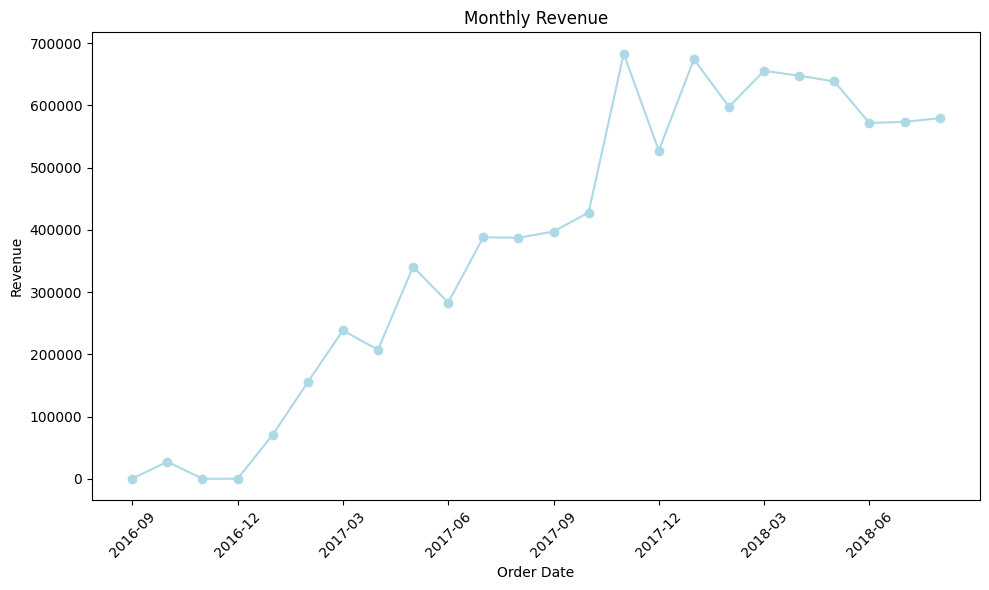

In [1419]:
# resampling data per month and calculating the amount of revenue
monthly_orders_df = merged_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "count",
    "price": "sum"
})

# change the date format to be year-month
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

# rename columns
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue", 
    "order_purchase_timestamp": "order_date"}, inplace=True) 

# exclude data for September 2018 because the last order is on 3rd September
monthly_orders_df = monthly_orders_df[monthly_orders_df['order_date'] != '2018-09']

# create plot for revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders_df['order_date'], monthly_orders_df['revenue'], marker='o', color='lightblue')
plt.title('Monthly Revenue')
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', rotation=45) 
plt.xticks(monthly_orders_df['order_date'][::3], rotation=45)  
plt.grid(False)
plt.tight_layout()
plt.show()


**Insight:**
* The visualizations reveal a significant growth revenue patterns over time. The monthly revenue shows a notable increase, particularly between September 2017 and before December 2017, revenue peaking at nearly 700.000 during this period. This surge reflects the effectiveness of marketing strategies and customer engagement initiatives, which have successfully driven sales growth. However, there is a significant decline in revenue, dropping back to almost 500.000, before stabilizing to constant growth. This downward trend suggests potential operational challenges that may need to be addressed to maintain customer satisfaction and retention.

* Despite the downturn in revenue, the data shows a strong growth in order count, indicating the company’s resilience and ability to effectively engage customers. This suggests that while customers are still making purchases, there may be issues affecting their overall spending behavior, which could be linked to factors such as product availability, customer experience, or market competition. By analyzing these trends, businesses can identify the underlying causes of the revenue decline and take proactive measures to improve performance.

## **Advanced Analysis (Optional)**

**Question 2: Show best customers based on RFM Parameters**

In [1420]:
# pivoting data
rfm_df = merged_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "count", 
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# count last day of transaction for each customer (day)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = merged_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14984\2426908898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_14984\2426908898.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\user\AppData\Local\Temp\ipykernel_14984\2426908898.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

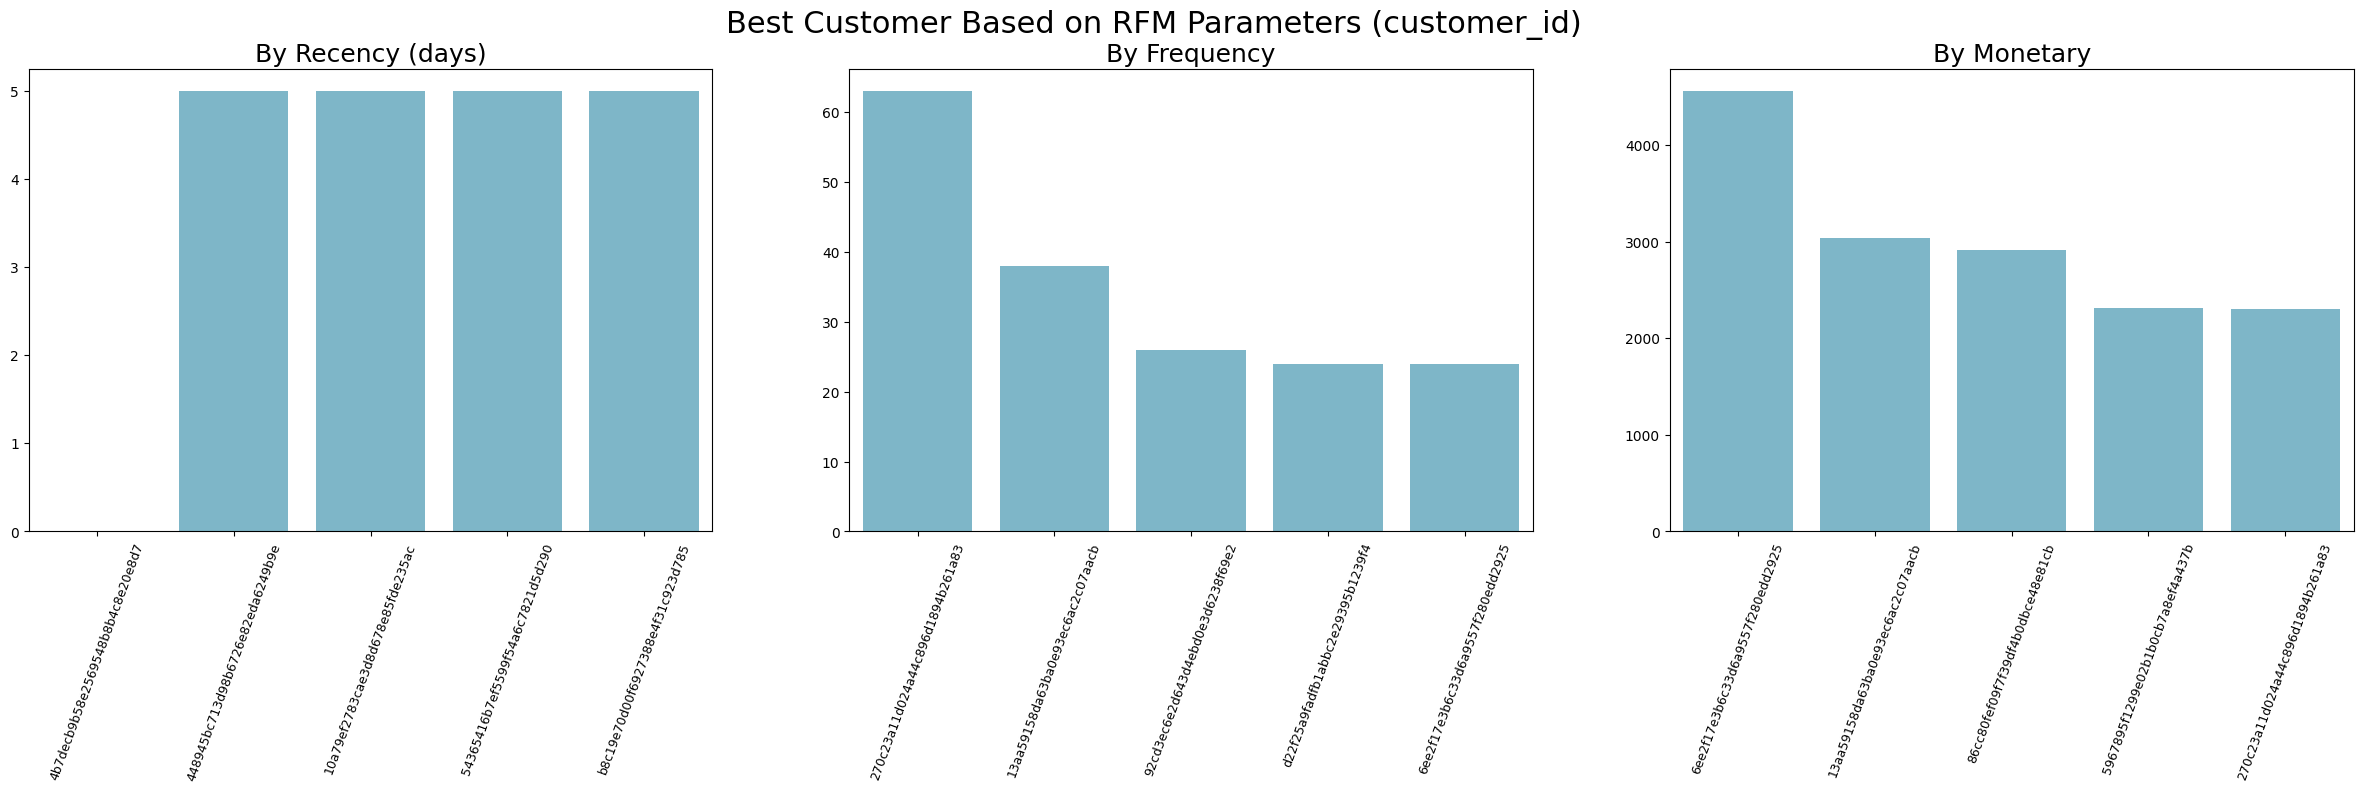

In [1421]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=9)
ax[0].tick_params(axis='x', rotation=70)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=9)
ax[1].tick_params(axis='x', rotation=70)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=9)
ax[2].tick_params(axis='x', rotation=70)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=22)
plt.show()

**Insight:**
* The RFM analysis provides valuable insights into customer behavior that can inform strategic business decisions. Based on recency, the data reveals that the time gap between a customer's last purchase and their next order is minimal. Notably, the first segment comprises customers who make repeat purchases within the same day, followed by four additional customers who also return after just five days. This pattern indicates a high level of customer loyalty, suggesting that the e-commerce platform successfully cultivates a loyal customer base eager to shop again shortly after their last transaction.

* When examining frequency, it becomes apparent that some customers exhibit remarkable purchasing behavior, with one individual placing up to 60 repeat orders. This is complemented by additional customers who exceed 20 orders, highlighting not only customer satisfaction with the products and services offered but also the potential for increased revenue through repeat business. Such patterns indicate that the e-commerce platform meets customer needs effectively, creating a reliable shopping experience that encourages loyalty and ongoing patronage.

* From a monetary perspective, the analysis shows customers making substantial transactions, with the highest total reaching 4.000, followed closely by others exceeding 2.000. This suggests that customers perceive significant value in the offerings, further affirming their satisfaction with both the products and services provided. Understanding these dynamics enables the e-commerce business to tailor marketing efforts, enhance customer engagement strategies, and ultimately drive sustained growth by focusing on retaining and nurturing their most valuable customers.

**Question 3: Give the distribution of monetary in recency segment and value segment**

In [1422]:
# R score analysis
rfm_df['R_score'] = rfm_df['recency'].apply(lambda x: 3 if x <= 30 else (2 if x <= 90 else 1))

# F score analysis
rfm_df['F_score'] = rfm_df['frequency'].apply(lambda x: 3 if x >=15 else (2 if x >=7 else 1))

# M score analysis
rfm_df['M_score'] = pd.qcut(rfm_df['monetary'], q=[0, 0.4, 0.8, 1], labels=[1, 2, 3])

In [1423]:
# segmentation based on monetery
rfm_df['value_segment'] = pd.qcut(rfm_df['monetary'], q=[0, 0.4, 0.8, 1], labels=['Low Value', 'High Value', 'Special Value'])

# segmentation based on recency
rfm_df['recency_segment'] = rfm_df['recency'].apply(lambda x: 'Active' if x <= 30 else ('Warm' if x <= 90 else 'Cold' if x <= 180 else 'Inactive'))

C:\Users\user\AppData\Local\Temp\ipykernel_14984\414968449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary_sum_value = rfm_df.groupby(by='value_segment')['monetary'].sum()


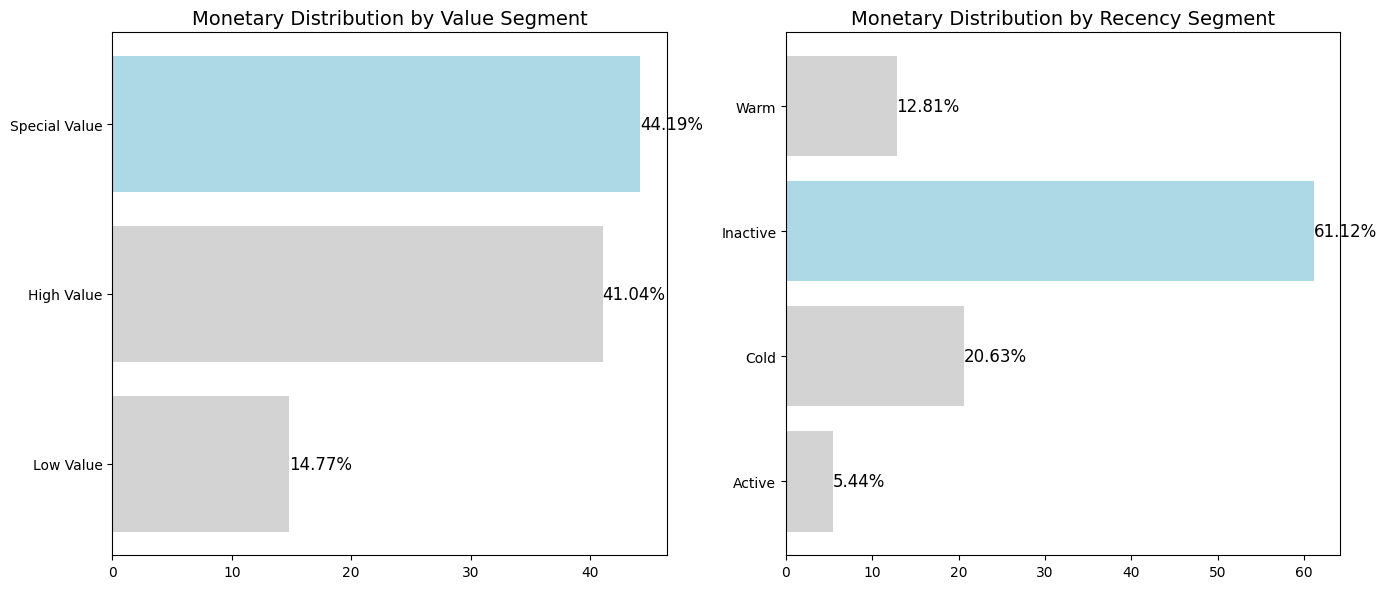

In [1424]:
# group by 'value_segment' and sum the 'monetary' values
monetary_sum_value = rfm_df.groupby(by='value_segment')['monetary'].sum()
monetary_sum_recency = rfm_df.groupby(by='recency_segment')['monetary'].sum()

# calculate the percentage
monetary_percent_value = (monetary_sum_value / monetary_sum_value.sum()) * 100
monetary_percent_recency = (monetary_sum_recency / monetary_sum_recency.sum()) * 100

# create color lists: gray for all, color for the max
colors_value = ['lightgray'] * len(monetary_percent_value)
colors_recency = ['lightgray'] * len(monetary_percent_recency)

# highlight the maximum values
max_value_index = np.argmax(monetary_percent_value.values)
colors_value[max_value_index] = 'lightblue'  # Color for maximum value
max_recency_index = np.argmax(monetary_percent_recency.values)
colors_recency[max_recency_index] = 'lightblue'  # Color for maximum recency value


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

bars_value = axes[0].barh(monetary_percent_value.index, monetary_percent_value.values, color=colors_value)
for bar in bars_value:
    xval = bar.get_width()
    axes[0].text(xval, bar.get_y() + bar.get_height()/2, f'{xval:.2f}%', ha='left', va='center', fontsize=12)

axes[0].set_title('Monetary Distribution by Value Segment', fontsize=14)
axes[0].set_xlabel(None, fontsize=12)  # Add x-axis label
axes[0].set_ylabel(None, fontsize=12)  # Add y-axis label

bars_recency = axes[1].barh(monetary_percent_recency.index, monetary_percent_recency.values, color=colors_recency)
for bar in bars_recency:
    xval = bar.get_width()
    axes[1].text(xval, bar.get_y() + bar.get_height()/2, f'{xval:.2f}%', ha='left', va='center', fontsize=12)

axes[1].set_title('Monetary Distribution by Recency Segment', fontsize=14)
axes[1].set_xlabel(None, fontsize=12) 
axes[1].set_ylabel(None, fontsize=12) 

plt.tight_layout()
plt.show()


**Insight:**
* The monetary distribution by value segment illustrates a strong financial performance for the e-commerce, with a substantial portion of revenue generated from customers classified as "special value" at 44.19% and "high value" at 41.04%. In contrast, customers in the "low value" segment account for only 14.77% of total revenue. This distribution indicates that a significant majority of customers possess high purchasing power, which is crucial for driving the growth and sustainability of the e-commerce business. By focusing on retaining and engaging these high-value customers, the platform can further enhance its revenue streams and ensure long-term profitability.

* Conversely, the monetary distribution by recency segment reveals concerning trends, with a staggering 61.12% of customers categorized as inactive, followed by 20.63% as cold customers. This data suggests that a large number of customers have not made a purchase in over 90 days, raising red flags about customer retention and engagement strategies. It is essential for the business to investigate the factors contributing to this inactivity, whether through understanding customer feedback, enhancing marketing outreach, or improving product offerings. Addressing these issues will be vital for re-engaging these dormant customers, thereby unlocking potential revenue and ensuring a more balanced customer base for sustained growth in the competitive e-commerce landscape. 

**Question 4: Analyze the correlation of value segment and recency segment**

C:\Users\user\AppData\Local\Temp\ipykernel_14984\4204333359.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = rfm_df.pivot_table(index='value_segment',


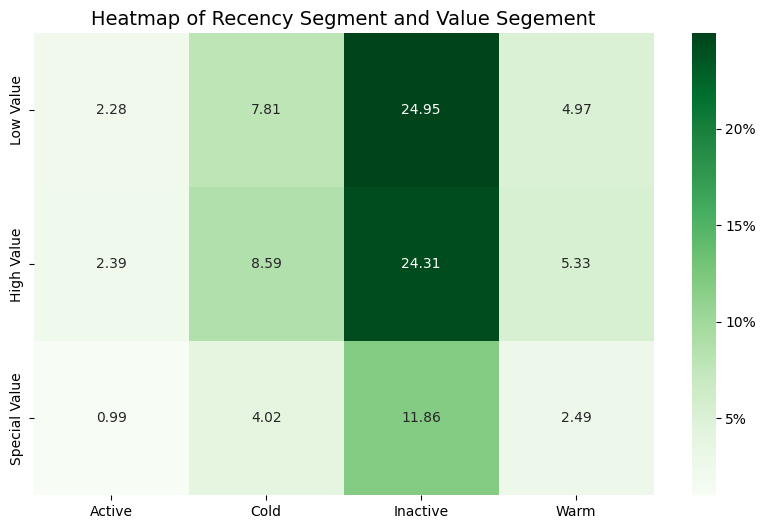

In [1425]:
pivot_table = rfm_df.pivot_table(index='value_segment', 
                                 columns='recency_segment', 
                                 aggfunc='size', fill_value=0)

# calculate percentage from each cell in pivot table
pivot_table_percent = (pivot_table / pivot_table.sum().sum()) * 100


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percent, annot=True, fmt='.2f', cmap='Greens', cbar_kws={'format': '%.0f%%'})
plt.title('Heatmap of Recency Segment and Value Segment', fontsize=14)
plt.xlabel(None, fontsize=12)
plt.ylabel(None, fontsize=12)
plt.show()

**Insight:**
* The visualization reveals a notable correlation between the value segment and the recency segment within the e-commerce. A significant portion of inactive customers, particularly those classified in the "low value" segment, demonstrates a concerning trend, with a correlation of 24.95%. This indicates that many customers fail to make repeat purchases after their last transaction, resulting in low transaction amounts that contribute only 0 to 40% of the total revenue percentile. This scenario is problematic as it suggests that while the e-commerce may attract a considerable number of customers, a significant portion of them is not engaging in repeat purchases, which is crucial for sustaining revenue growth.

* Furthermore, the second-highest correlation, at 24.31%, not so much differences or less than 1% with the previous correlation (24.95%) indicates that customers who have not made purchases in over 90 days exhibit high purchasing power. This suggests that although these customers have the potential to contribute significantly to revenue, they remain inactive for extended periods. Additionally, there are also inactive customers classified as "special value" with 11.86% as the number of correlation. These findings highlight a disconnect in the customer journey that could be attributed to inadequate marketing strategies or ineffective customer engagement initiatives. Addressing this gap is essential for enhancing customer retention and driving repeat purchases, which are fundamental for the long-term growth of the e-commerce business.

## **Conclusion**

* Question 1 conclution: The advanced analysis highlights a significant revenue increase between September and December 2017, peaking at 700.000, which reflects effective marketing and customer engagement. However, the subsequent revenue decline to 500.000 points to operational challenges that may affect customer satisfaction and retention. Despite this drop, the steady growth in order count suggests customer engagement remains strong, though spending behavior may be influenced by factors such as product availability or competition. These trends emphasize the importance of addressing operational issues and maintaining customer loyalty. Overall, continuous monitoring of revenue metrics is essential for optimizing strategies and ensuring long-term business success.

* Question 2 conclution: The RFM analysis reveals critical insights into customer behavior, informing strategic decisions for the business. Recency analysis shows minimal time gaps between purchases, with some customers returning on the same day, indicating high loyalty. Notably, one segment of customers repeats purchases after just five days, further emphasizing their eagerness to shop again. In terms of frequency, a few customers stand out with up to 60 repeat orders, suggesting high satisfaction with the platform’s services. The monetary analysis highlights substantial transactions, with the highest reaching 4.000, showing customers perceive great value in the offerings. These insights allow the business to refine marketing efforts and enhance customer engagement strategies to drive sustained growth. 

* Question 3 conclution: The analysis highlights that 44.19% of revenue is generated by "special value" customers and 41.04% by "high value" customers, showing strong financial performance. Only 14.77% of revenue comes from "low value" customers, emphasizing the importance of retaining high-value customers for sustained growth. However, the recency segment reveals that 61.12% of customers are inactive, and 20.63% are categorized as cold, indicating significant retention challenges. This inactivity suggests that customer engagement strategies need improvement to re-engage dormant customers. Understanding the reasons behind this inactivity is crucial to unlocking potential revenue. By addressing these issues, the platform can ensure a more balanced customer base and long-term growth.

* Question 4 conclution: The advanced analysis shows a clear correlation between the value and recency segments, revealing that many "low value" customers, particularly inactive ones, account for only 0 to 40% of total revenue. With a correlation of 24.95%, this highlights a lack of repeat purchases, which poses a challenge for sustaining long-term revenue growth. The second-highest correlation at 24.31% shows that customers inactive for over 90 days still possess high purchasing power, yet remain disengaged. Additionally, there are "special value" inactive customers with a correlation of 11.86%, further indicating the need for improved engagement. These insights suggest a disconnect in customer retention efforts, potentially due to ineffective marketing strategies. Addressing these gaps through targeted promotions and personalized communication could re-engage inactive customers and drive revenue growth.